# Exploratory data analysis and preprocessing

In [1]:
%load_ext autoreload
%autoreload 2

## Dependencies

In [274]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import sys

sys.path.append('../')
from src.constants import *
from src.utils import save_to_pickle
from src.eda import print_stats_for_categorical_feature, stats_for_numerical_features
from src.preprocessing import merge_similar_categories

## Reading Data

In [3]:
df_train = pd.read_feather(TRAIN_DATASET_PATH)

In [4]:
df_train.dtypes

age_of_client                 int64
type_of_work                 object
fnlwgt                        int64
education_level              object
num_of_years_of_education     int64
marital_status               object
ocupation                    object
type_of_relationship         object
type_of_race                 object
sex                          object
capital_gain                  int64
capital_loss                  int64
hours_of_work_per_week        int64
native_country               object
ernings_flag                 object
dtype: object

## Summary of features

Below we can see which predictors are categorical, and which are numerical.

In [5]:
def extract_predictors():
    features = df_train.drop(columns=ORIGINAL_TARGET).dtypes
    categorical_features = features[features == "object"].index.tolist()
    numerical_features = features[features != "object"].index.tolist()
    return categorical_features, numerical_features

categorical_features, numerical_features = extract_predictors()

print("Categorical features:\n" + "\n".join(categorical_features) + "\n")
print("Numerical features:\n" + "\n".join(numerical_features))

Categorical features:
type_of_work
education_level
marital_status
ocupation
type_of_relationship
type_of_race
sex
native_country

Numerical features:
age_of_client
fnlwgt
num_of_years_of_education
capital_gain
capital_loss
hours_of_work_per_week


Below is a summary of each of the categorical variables. We present the number of categories and the Herfindahl-Hirschman index, which measures how "diverse" the categorical variable is. Values close to zero indicate that the distribution of the training sample in each of the categories is approximately uniform, while values close to one indicate that a single category encompasses a large part of the sample. 

We also present the Gini index of the variables, as well as 99% bootstrap confidence intervals. This index is defined as 2*AUC - 1, where AUC is the area under the ROC curve. This metric takes values in \[-1, 1\]. Absolute values close to 1 indicate that the variable has a lot of predictive power, while values around zero, null predictive power. 

In [21]:
for feature in categorical_features:
    print_stats_for_categorical_feature(df_train, feature)

Summary of type_of_work
Number of categories: 9
Most common category: Private
Highest proportion of positives: Self-emp-inc
Lowest proportion of positives: Never-worked
Herfindahl–Hirschman index: 44.07%
Gini index: 16.62%
Gini index confidence interval: (14.97%, 18.33%)


,mean_target,count
type_of_work,,
Never-worked,0.000000,7
Without-pay,0.000000,13
?,0.102454,1630
Private,0.218311,20425
State-gov,0.270178,1177
Self-emp-not-inc,0.280122,2299
Local-gov,0.296158,1874
Federal-gov,0.384259,864
Self-emp-inc,0.556650,1015


Summary of education_level
Number of categories: 16
Most common category: HS-grad
Highest proportion of positives: Doctorate
Lowest proportion of positives: Preschool
Herfindahl–Hirschman index: 13.68%
Gini index: 43.33%
Gini index confidence interval: (41.63%, 45.14%)


,mean_target,count
education_level,,
Preschool,0.000000,45
1st-4th,0.038217,157
5th-6th,0.046053,304
11th,0.050095,1058
9th,0.057906,449
7th-8th,0.065719,563
10th,0.067296,847
12th,0.078534,382
HS-grad,0.157778,9469


Summary of marital_status
Number of categories: 7
Most common category: Married-civ-spouse
Highest proportion of positives: Married-civ-spouse
Lowest proportion of positives: Never-married
Herfindahl–Hirschman index: 23.03%
Gini index: 53.91%
Gini index confidence interval: (52.56%, 55.28%)


,mean_target,count
marital_status,,
Never-married,0.045384,9629
Separated,0.063373,931
Married-spouse-absent,0.077540,374
Widowed,0.084842,884
Divorced,0.106083,3978
Married-AF-spouse,0.434783,23
Married-civ-spouse,0.445532,13485


Summary of ocupation
Number of categories: 15
Most common category: Prof-specialty
Highest proportion of positives: Exec-managerial
Lowest proportion of positives: Priv-house-serv
Herfindahl–Hirschman index: 3.25%
Gini index: 46.09%
Gini index confidence interval: (44.43%, 47.74%)


,mean_target,count
ocupation,,
Priv-house-serv,0.007042,142
Other-service,0.042396,2972
Handlers-cleaners,0.064019,1234
?,0.102016,1637
Farming-fishing,0.112335,908
Armed-Forces,0.125000,8
Machine-op-inspct,0.125207,1813
Adm-clerical,0.134977,3408
Transport-moving,0.200000,1430


Summary of type_of_relationship
Number of categories: 6
Most common category: Husband
Highest proportion of positives: Wife
Lowest proportion of positives: Own-child
Herfindahl–Hirschman index: 12.13%
Gini index: 55.92%
Gini index confidence interval: (54.58%, 57.24%)


,mean_target,count
type_of_relationship,,
Own-child,0.013345,4571
Other-relative,0.035915,891
Unmarried,0.063933,3097
Not-in-family,0.102764,7454
Husband,0.446250,11879
Wife,0.483003,1412


Summary of type_of_race
Number of categories: 5
Most common category: White
Highest proportion of positives: Asian-Pac-Islander
Lowest proportion of positives: Other
Herfindahl–Hirschman index: 67.47%
Gini index: 7.44%
Gini index confidence interval: (6.42%, 8.60%)


,mean_target,count
type_of_race,,
Other,0.087866,239
Amer-Indian-Eskimo,0.113553,273
Black,0.125000,2808
White,0.255324,25027
Asian-Pac-Islander,0.258098,957


Summary of sex
Number of categories: 3
Most common category: Male
Highest proportion of positives: ?
Lowest proportion of positives: Female
Herfindahl–Hirschman index: 33.38%
Gini index: 23.65%
Gini index confidence interval: (22.40%, 24.88%)


,mean_target,count
sex,,
Female,0.110174,9721
Male,0.304763,19566
?,0.352941,17


Summary of native_country
Number of categories: 42
Most common category: United-States
Highest proportion of positives: France
Lowest proportion of positives: Outlying-US(Guam-USVI-etc)
Herfindahl–Hirschman index: 79.78%
Gini index: 6.03%
Gini index confidence interval: (5.05%, 7.12%)


,mean_target,count
native_country,,
Outlying-US(Guam-USVI-etc),0.000000,14
Holand-Netherlands,0.000000,1
Dominican-Republic,0.030303,66
Columbia,0.036364,55
Mexico,0.054329,589
Guatemala,0.054545,55
Nicaragua,0.060606,33
Peru,0.066667,30
Vietnam,0.079365,63


We can see that the most diverse categorical variable is, according to the HH index, “occupation” followed by “type_of_relationship”. The least diverse is “native_country” followed by “type_of_race”. 

Note that the most predominant native nationality and race are respectively United States and white. Therefore, it is not to be expected that any model fitted on this training set would have good predictions in populations where the majority native nationality is not the United States or where the predominant race is not white.

From the confidence intervals we can see that all categorical variables have predictive power (since they do not contain zero), although not all are equally powerful. The most powerful is “type_of_relationship”, while the least powerful is “native_country”. 

Note that all levels corresponding to an elementary school level of education have about the same odds of individuals having an income above $50k, of about 5%. Therefore, categories such as “1st-4th”, “5th-6th”,..., “12th” can be joined. This will be done below with Optimal Binning in an automatic way.

Below we can see a similar analysis but now for the numerical variables. 

Summary of age_of_client
Mean: 38.55
Median: 37.00
Standard Deviation: 13.65
Range: 73.00
Skewness: 0.56
Kurtosis: -0.17
Gini index: 36.94%
Gini index confidence interval: (35.24%, 38.52%)


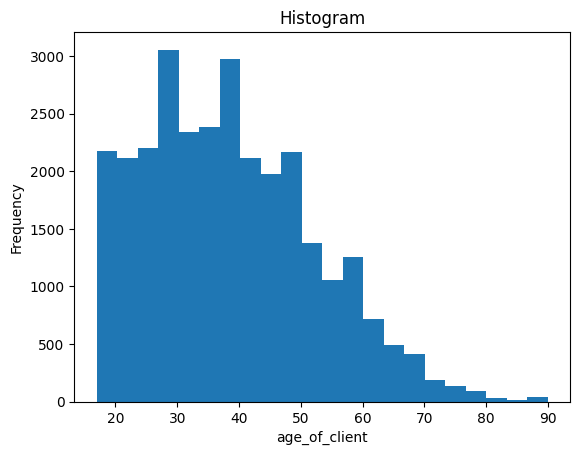

Summary of fnlwgt
Mean: 189909.67
Median: 178469.50
Standard Deviation: 105655.82
Range: 1472420.00
Skewness: 1.47
Kurtosis: 6.50
Gini index: -1.07%
Gini index confidence interval: (-3.06%, 1.09%)


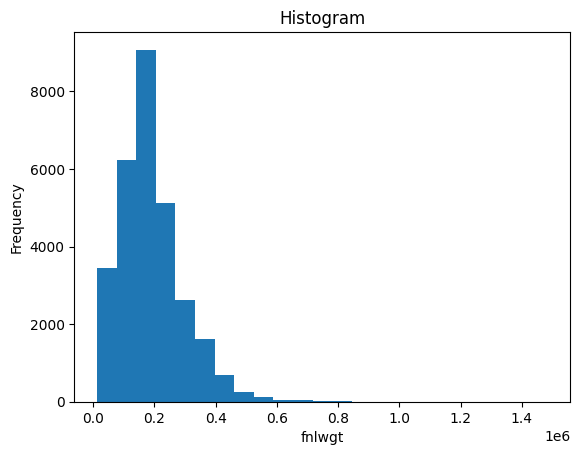

Summary of num_of_years_of_education
Mean: 10.09
Median: 10.00
Standard Deviation: 2.57
Range: 15.00
Skewness: -0.31
Kurtosis: 0.63
Gini index: 43.27%
Gini index confidence interval: (41.55%, 45.09%)


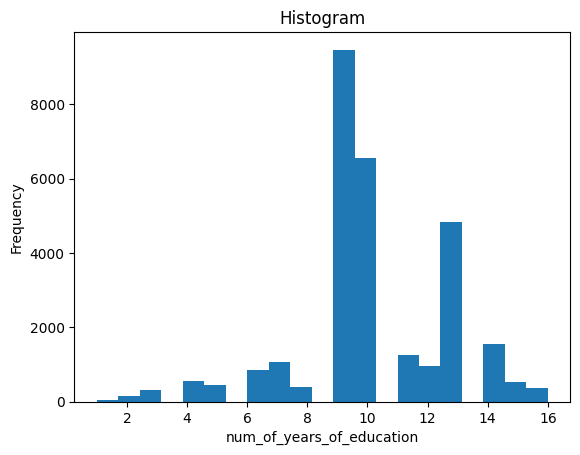

Summary of capital_gain
Mean: 1071.23
Median: 0.00
Standard Deviation: 7363.07
Range: 99999.00
Skewness: 11.98
Kurtosis: 155.52
Gini index: 17.90%
Gini index confidence interval: (16.56%, 19.13%)


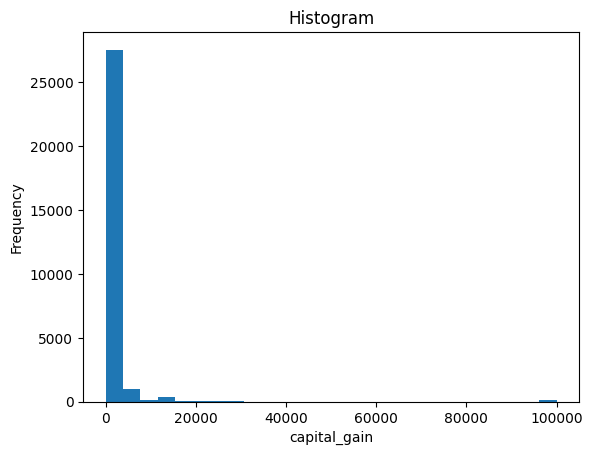

Summary of capital_loss
Mean: 86.73
Median: 0.00
Standard Deviation: 401.25
Range: 4356.00
Skewness: 4.62
Kurtosis: 20.70
Gini index: 6.80%
Gini index confidence interval: (5.88%, 7.71%)


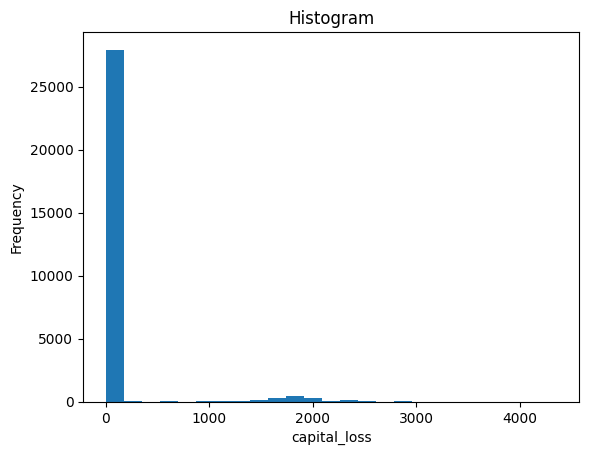

Summary of hours_of_work_per_week
Mean: 40.46
Median: 40.00
Standard Deviation: 12.39
Range: 98.00
Skewness: 0.24
Kurtosis: 2.92
Gini index: 34.35%
Gini index confidence interval: (32.51%, 35.84%)


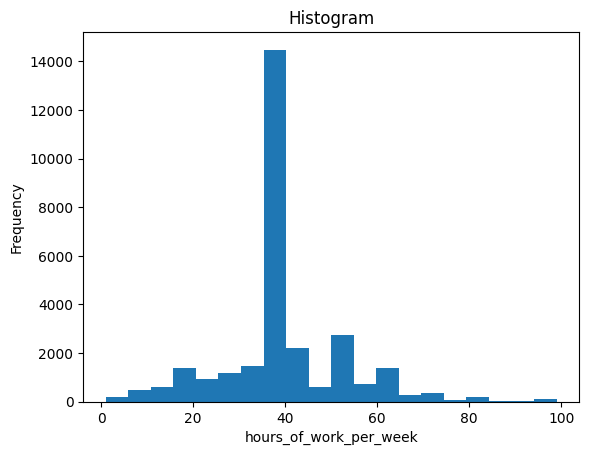

In [29]:
for feature in numerical_features:
    stats_for_numerical_features(df_train, feature)

## Preprocessing

In [325]:
feature = categorical_features[7]
x = df_train[feature].values
y = (df_train[ORIGINAL_TARGET] == POSITIVE_CLASS).astype(int).values

In [326]:
table = merge_similar_categories(x, y)

In [327]:
table

,negative,positive,proportion
"(Columbia, Dominican-Republic, El-Salvador, Guatemala, Mexico, Puerto-Rico, Vietnam)",957,61,0.059921
"(?, Cambodia, Canada, China, Cuba, Ecuador, England, France, Germany, Greece, Haiti, Holand-Netherlands, Honduras, Hong, Hungary, India, Iran, Ireland, Italy, Jamaica, Japan, Laos, Nicaragua, Outlying-US(Guam-USVI-etc), Peru, Philippines, Poland, Portugal, Scotland, South, Taiwan, Thailand, Trinadad&Tobago, United-States, Yugoslavia)",21307,6979,0.246730
